In [0]:
#Installing and importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.style.use('default')
from tensorflow.contrib import rnn

import pickle
#!pip install librosa 
import librosa


In [0]:
#Speech Denoising Using LSTM
import glob
from google.colab import drive
import librosa
#mount drive
drive.mount('/content/gdrive/')
#Unzip the contents
!unzip /content/gdrive/'My Drive'/Assignment_3/homework3.zip

#!ls timit-homework/
#Path for files
train_path = 'timit-homework/tr/'
val_path = 'timit-homework/v/'
test_path = 'timit-homework/te/'

#Function to covert audio files to stft
def input_array(path,name):
  out = {'train_p':[],'train_a':[],
          'clean_p':[],'clean_a':[],
          'noise_p':[],'noise_a':[]}
  for file in sorted(glob.iglob(path +name +'x*.wav')):
    #print (type(file))
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    #print(sn,X)
    out['train_p'].append(sn)
    out['train_a'].append(X)
  for file in sorted(glob.iglob(path + name +'s*.wav')):
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    out['clean_p'].append(sn)
    out['clean_a'].append(X)
  for file in sorted(glob.iglob(path + name +'n*.wav')):
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    out['noise_a'].append(X)
  return out

#Converting train and validation files to stft
train = input_array(train_path,'tr')
#test = input_array(test_path,'te')
val = input_array(val_path,'v')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Archive:  /content/gdrive/My Drive/Assignment_3/homework3.zip
   creating: timit-homework/
   creating: timit-homework/te/
  inflating: timit-homework/te/tex0083.wav  
  inflating: timit-homework/te/tex0097.wav  
  inflating: timit-homework/te/tex0040.wav  
  inflating: timit-homework/te/tex0054.wav  
  inflating: timit-homework/te/tex0068.wav  
  inflating: timit-homework/te/tex0281.wav  
  inflating: timit-homework/te/tex0295.wav  
  inflating: timit-homework/te/tex0242.wav  
  inflating: timit-homework/te/tex0256.wav  
  inflating: timit-homework/te/tex0336.wav  
  inflating: timit-homework/te/tex0322.wav  
  inflating: timit-homework/te/tex0134.wav  
  inflating: timit-homework/te/tex0120.wav  
  inflating: timit-homework/te/tex0108.wav  
  inflating: timit-homework/te/tex0109.wav  
  inflating: timit-homework/te/tex0121.wav  
  inflating: timit-homew

In [0]:
#Write the spectogram information into pickle files
import pickle

path ='/content/gdrive/My Drive/Assignment_3/'  

output = open(path+'train.pkl', 'wb')
pickle.dump(train,output)

# output = open(path+'test.pkl', 'wb')
# pickle.dump(test,output)

output = open(path+'val.pkl', 'wb')
pickle.dump(val,output)


In [0]:
#Load pickle files from gdrive

from google.colab import drive
drive.mount('/content/gdrive/')


path ='/content/gdrive/My Drive/Assignment_3/'
f = open(path + 'train.pkl','rb') 
train = pickle.load(f)


f = open(path + 'val.pkl','rb') 
val = pickle.load(f)

# f = open(path + 'test.pkl','rb') 
# test = pickle.load(f)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#ibm mask function

def ibm(file):
  mask = []
  for i in range(len(file['clean_a'])):
    comp = np.where(np.abs(file['clean_a'][i]) > np.abs(file['noise_a'][i]),1,0)
    mask.append(comp)
  return mask

#Training and validation mask files
train_mask = ibm(train)
val_mask = ibm(val)

    
    

In [0]:
#train data input
x_train = [np.abs(i).T for i in train['train_a']]
x_train_len = [i.shape[0] for i in x_train]
y_train = [i.T for i in train_mask]
x_train_s = train['train_p']

#val data input
x_val = [np.abs(i).T for i in val['train_a']]
x_val_len = [i.shape[0] for i in x_val]
y_val = [i.T for i in val_mask]        

137
138
139
140
Epoch 140 	| Batch Loss = 0.109
141
142
143
144
145
146
147
148
149
150
Epoch 150 	| Batch Loss = 0.109
151
152
153
154
155
156
157
158
159
160
Epoch 160 	| Batch Loss = 0.109
161
162
163
164
165
166
167
168
169
170
Epoch 170 	| Batch Loss = 0.107
171
172
173
174
175
176
177
178
179
180
Epoch 180 	| Batch Loss = 0.107
181
182
183
184
185
186
187
188
189
190
Epoch 190 	| Batch Loss = 0.107
191
192
193
194
195
196
197
198
199


Text(0.5, 1.0, 'Convergence')

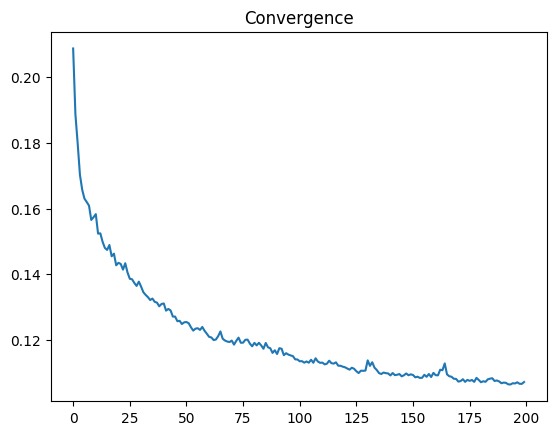

In [0]:
# Question_2 
#LSTM


#next_batch
def next_batch(x,y,seq,start,batch_size):
    return np.array(x[start:start + batch_size]),np.array(y[start:start + batch_size]),np.array(seq[start:start + batch_size])
  

                                
#Network Parameters
n_classes = 513                             
hidden_units = 128

#Defining hyperparamters
batch_size = 10
n_epoch = 200
display_f = 10
learning_rate = 0.001
dropout = 0.1

#Calc number of iterations in each epoch
n_iter = len(x_train)//batch_size

#layer function
def rnn_layer(x,seq_len,hidden_units):   
    output, _ = tf.nn.dynamic_rnn(tf.nn.rnn_cell.DropoutWrapper(tf.contrib.rnn.LSTMCell(hidden_units, 
                                                         initializer =tf.contrib.layers.variance_scaling_initializer()),
                                                                output_keep_prob = 1 - dropout), 
                                  x, dtype=tf.float32, sequence_length=seq_len)
    return output
  
 
    
#Construct the graph
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,None,513])
y = tf.placeholder(tf.float32,[None,None,513])
seq_len = tf.placeholder(tf.int32,None)
#RNN layer 1
rnn_layer_1 = rnn_layer(x,seq_len,hidden_units)

#Dense layer
layer_out = tf.layers.dense(rnn_layer_1, n_classes, kernel_initializer= tf.contrib.layers.variance_scaling_initializer(),activation=tf.sigmoid)




#Loss and optimizer
loss = tf.reduce_mean(tf.losses.mean_squared_error(y,layer_out))
train_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
    
#Saving the session
saver = tf.train.Saver()

#Running the session
with tf.Session()  as sess:
  err = np.zeros(n_epoch)
  tf.global_variables_initializer().run() 
  tf.local_variables_initializer().run()
  for epoch in range(n_epoch):
    
    for itr in range(n_iter):    
      
      x_batch,y_batch,seq_batch = next_batch(x_train,y_train,x_train_len,itr*batch_size,batch_size)
      _,err[epoch] = sess.run([train_optimizer,loss], feed_dict={x:x_batch,y:y_batch,seq_len:seq_batch})
    
    saver.save(sess, "Model_2")

    #Pring the batch Loss  for each epoch
    if epoch%display_f == 0:      
      print("Epoch", str(epoch), "\t| Batch Loss =", str(round(err[epoch],3)))
    
#plotting convergence    
plt.figure()
plt.plot(err)
plt.title('Convergence')                                  



In [0]:
#Calculating SNR for train data
with tf.Session() as sess:
  saver.restore(sess, "Model_2")

  out = []
  for i in range(len(x_train)): 
      out.append(sess.run(layer_out, feed_dict={x:x_train[i].\
                    reshape(1,x_train[i].shape[0],x_train[i].shape[1]),\
                    y:y_train[i].reshape(1,y_train[i].shape[0],y_train[i].shape[1]),\
                    seq_len:x_train_len[i]}))
#Transposing and reshaping the output
train_out = [i.reshape(i.shape[1],i.shape[2]).T for i in out]

#Loading the stft for train files
x_train_stft = train['train_a']
  
#SNR function
def snr(x,s,p):
  #_,phase = librosa.magphase(x)  
  p=librosa.istft(p*x, hop_length=512,length=len(s))
  a = np.matmul(np.transpose(s),s)
  b = np.matmul(np.transpose(s-p),s-p)
  return 10*np.log10(a/b)

#Train SNR
#Clean signal stft
train_clean = train['clean_p']

#Calculating SNR for all train inputs and storing them in a list
snr_train =  [snr(x_train_stft[i],train_clean[i],train_out[i]) for i in range(len(x_train)) ]
print("The Average SNR for train is "+ str(sum(snr_train)/len(snr_train)))
  


INFO:tensorflow:Restoring parameters from Model_2
The Average SNR for train is 10.943535578747591


In [0]:
#Calculating SNR for val data
with tf.Session() as sess:
  saver.restore(sess, "Model_2")

  out = []
  loss_val = []
  for i in range(len(x_val)): 
    net_out,net_loss sess.run([layer_out,loss], feed_dict={x:x_val[i].\
                    reshape(1,x_val[i].shape[0],x_val[i].shape[1]),\
                    y:y_val[i].reshape(1,y_val[i].shape[0],y_val[i].shape[1]),\
                    seq_len:x_val_len[i]})
     
    out.append(net_out)
    loss_val.append(net_loss)
#Transposing and reshaping the output
val_out = [i.reshape(i.shape[1],i.shape[2]).T for i in out]

#Loading the stft for val files
x_val_stft = val['train_a']
  
#SNR function
def snr(x,s,p):
  #_,phase = librosa.magphase(x)  
  p=librosa.istft(p*x, hop_length=512,length=len(s))
  a = np.matmul(np.transpose(s),s)
  b = np.matmul(np.transpose(s-p),s-p)
  return 10*np.log10(a/b)

#val SNR
#Clean signal stft
val_clean = val['clean_p']

#Calculating SNR for all val inputs and storing them in a list
snr_val =  [snr(x_val_stft[i],val_clean[i],val_out[i]) for i in range(len(x_val)) ]
print("The Average SNR for validation is "+ str(sum(snr_val)/len(snr_val)))
print("The Average Loss for validation is "+ str(sum(loss_val)/len(loss_val)))


INFO:tensorflow:Restoring parameters from Model_2
The Average SNR for validation is 10.331948700050512


In [0]:
#Getting the output for test signals and saving them to .wav format
read_path = 'timit-homework/te/'
out_path = '/content/gdrive/My Drive/Assignment_3/Test_output/'

with tf.Session() as sess:
  saver.restore(sess, "Model_2")
  i = 0
  for file in sorted(glob.iglob(read_path  +'tex*.wav')):   
    #print (type(file))
    sn, sr=librosa.load(file, sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    #print(sn,X)
    x_test = np.transpose(np.abs(X))
    test_out = sess.run(layer_out, feed_dict={x:x_test.\
                      reshape(1,x_test.shape[0],x_test.shape[1]),\
                      seq_len:x_test.shape[0]})
    #Transposing and reshaping the output
    test_out = test_out.reshape([test_out.shape[1],test_out.shape[2]]).T
    p = librosa.istft(test_out*X , hop_length=512,length=len(sn))   
    librosa.output.write_wav(out_path + 'test_recons_'+str(i)+'.wav', p, sr)
    i +=1


INFO:tensorflow:Restoring parameters from Model_2
